In [85]:
import numpy as np
import pandas as pd

df = pd.read_csv('canada_edu.csv')

ModuleNotFoundError: No module named 'n'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Columns: 124 entries, UIS.NIRA.1 to SI.POV.GINI
dtypes: float64(122), int64(2)
memory usage: 42.8 KB


In [ ]:
df.describe()

,UIS.NIRA.1,UIS.XSPENDP.FDPUB.FNS,BAR.PRM.SCHL,BAR.SEC.SCHL,BAR.TER.SCHL,BAR.TOT.SCHL,BAR.NOED.15UP.ZS,BAR.PRM.CMPT.15UP.ZS,BAR.PRM.ICMP.15UP.ZS,BAR.SEC.CMPT.15UP.ZS,...,NY.GDP.PCAP.KD,NY.GDP.PCAP.PP.KD,NY.GDP.MKTP.PP.KD,SE.XPD.TOTL.GD.ZS,SL.TLF.ADVN.ZS,SL.TLF.BASC.ZS,SL.TLF.INTM.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SI.POV.GINI
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000
mean,91.107821,69.008087,5.581727,3.841288,0.744576,10.168273,1.021136,6.995682,15.459318,25.651364,...,37539.812575,33814.697070,1.025720e+12,6.200091,76.434416,41.450667,73.339333,1.683840e+07,1.168011,32.593333
std,3.637110,1.576972,0.184761,0.720574,0.284598,1.155726,0.292123,4.430775,8.378616,5.416208,...,7526.561280,4680.539725,2.193605e+11,0.767380,4.450308,3.077076,7.119532,1.220395e+06,0.274236,0.937480
min,88.043053,65.455780,5.327333,2.763333,0.487333,8.596000,0.670000,2.240000,4.790000,17.390000,...,24629.215560,30115.281240,8.513584e+11,4.648700,59.660000,31.830000,65.890999,1.471654e+07,0.796845,31.000000
25%,88.043053,68.887654,5.425333,3.414000,0.563333,9.528667,0.830000,3.580000,9.280000,20.300000,...,31537.862350,30115.281240,8.588757e+11,5.882095,76.434416,41.450667,70.176250,1.642797e+07,0.987189,31.637500
50%,90.228756,68.887654,5.618667,3.785333,0.670667,9.968667,0.880000,5.370000,13.490000,27.250000,...,36640.512995,30399.403200,8.643622e+11,6.200091,76.434416,41.450667,73.339333,1.683840e+07,1.088265,32.593333
75%,91.107821,68.887654,5.720000,4.227333,0.754667,10.704000,1.080000,8.790000,19.110000,30.190000,...,44972.824147,38576.655588,1.212887e+12,6.708625,78.457499,41.927751,73.339333,1.704893e+07,1.297876,33.500000
max,99.719414,74.186705,5.857333,5.083333,1.342000,12.282667,1.590000,16.820000,31.970000,32.110000,...,49355.096640,42335.668280,1.488330e+12,7.710190,81.457001,49.676998,98.529999,1.950646e+07,1.891678,33.800000


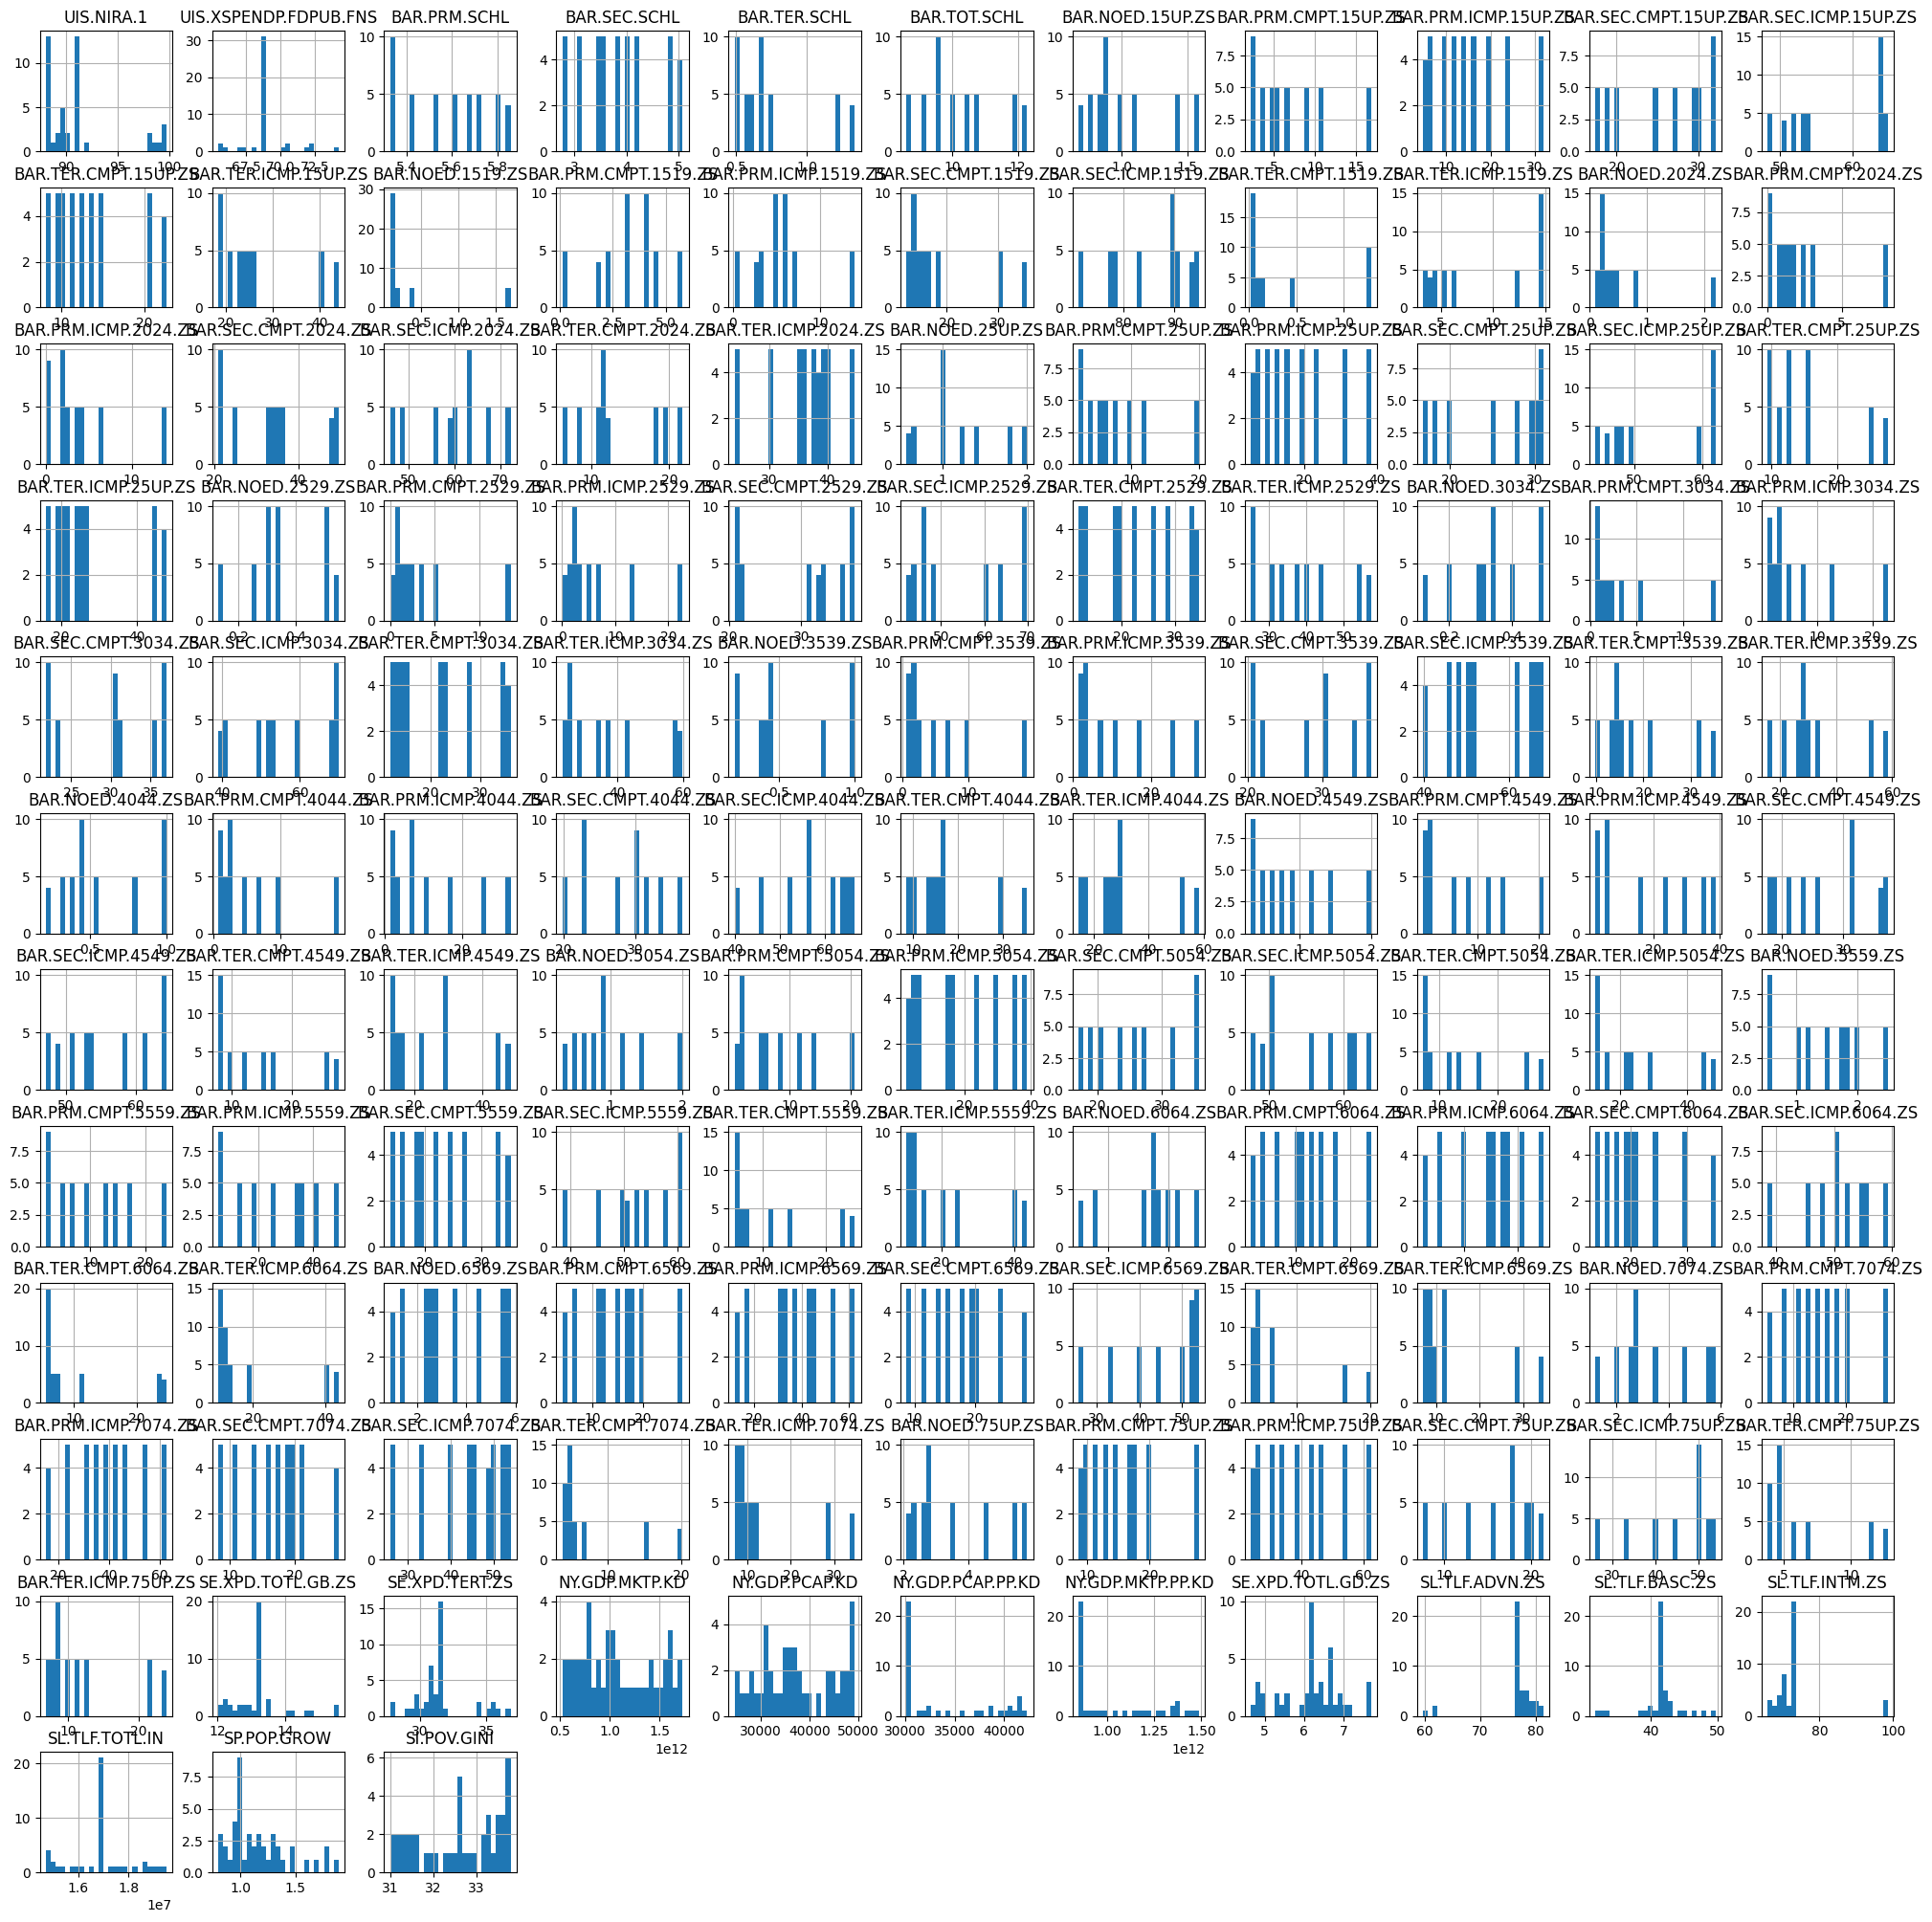

In [ ]:
df.hist(bins=25, figsize=(25, 25))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


y = df['SI.POV.GINI']
X = df.drop('SI.POV.GINI', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, HalvingRandomSearchCV, RandomizedSearchCV

svr_rmse = -cross_val_score(svr, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(svr_rmse).describe()

count    10.000000
mean      0.299441
std       0.142375
min       0.096953
25%       0.187478
50%       0.295733
75%       0.387501
max       0.546004
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
lin_rmse = -cross_val_score(lin_reg, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(lin_rmse).describe()

count    10.000000
mean      0.597326
std       0.593061
min       0.111202
25%       0.223674
50%       0.361123
75%       0.748870
max       2.029689
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfr = RandomForestRegressor(random_state=42, n_estimators=10)
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
rfr_rmses = -cross_val_score(rfr, X_train_scaled, y_train, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(rfr_rmses).describe()

count    10.000000
mean      0.361481
std       0.260539
min       0.075622
25%       0.229600
50%       0.304808
75%       0.404087
max       0.999750
dtype: float64

In [ ]:
hyperparameters = {
  'kernel': ['poly', 'rbf', 'linear'], 
  'degree': list(range(1,10)),
  'gamma': ['auto', 'scale']
}

svr_search = RandomizedSearchCV(svr, hyperparameters, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, random_state=42, verbose=True, n_jobs=-1)
svr_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['poly', 'rbf', 'linear']},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [ ]:
svr_search.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 4}

In [ ]:
final_svr = svr_search.best_estimator_

In [ ]:
cv_res_svr_search = pd.DataFrame(svr_search.cv_results_)
cv_res_svr_search.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res_svr_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001073,0.000870,0.000344,0.000215,rbf,auto,4,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 4}",-0.204777,-0.509128,...,-0.309358,0.126536,1,-0.226291,-0.192685,-0.232654,-0.262077,-0.237903,-0.230322,0.022379
1,0.000733,0.000682,0.000249,0.000175,rbf,auto,9,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 9}",-0.204777,-0.509128,...,-0.309358,0.126536,1,-0.226291,-0.192685,-0.232654,-0.262077,-0.237903,-0.230322,0.022379
7,0.000493,0.000261,0.000323,0.000248,rbf,scale,9,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': 9}",-0.207323,-0.504426,...,-0.311727,0.126393,3,-0.229801,-0.189884,-0.222927,-0.273783,-0.235697,-0.230418,0.026862
8,0.000710,0.000383,0.000226,0.000152,poly,scale,1,"{'kernel': 'poly', 'gamma': 'scale', 'degree': 1}",-0.211195,-0.637938,...,-0.389801,0.162382,4,-0.374781,-0.282806,-0.378220,-0.368086,-0.367707,-0.354320,0.035980
4,0.001335,0.000500,0.000695,0.000310,linear,auto,8,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",-0.461155,-0.602424,...,-0.424569,0.136122,5,-0.105671,-0.087317,-0.129994,-0.137854,-0.152131,-0.122594,0.023199


In [ ]:
hyperparameters = {
  'max_depth': list(range(6, 22)),
  'max_features': list(range(4, 12)),
  'n_estimators': list(range(1, 50))
}

wine_rfr_search = RandomizedSearchCV(rfr, hyperparameters, cv=5, n_iter=20, scoring='neg_root_mean_squared_error', random_state=42, return_train_score=True, verbose=True, n_jobs=-1)
wine_rfr_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21],
                                        'max_features': [4, 5, 6, 7, 8, 9, 10,
                                                         11],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [ ]:
wine_rfr_search.best_params_

{'n_estimators': 43, 'max_features': 11, 'max_depth': 21}

In [ ]:
wine_final_rfr = wine_rfr_search.best_estimator_

In [ ]:
from sklearn.metrics import mean_squared_error
from scipy import stats

final_preds_svr = final_svr.predict(X_test_scaled)

final_rmse_svr = mean_squared_error(y_test, final_preds_svr, squared=False)
final_mse_rfr = mean_squared_error(y_test, final_preds_svr, squared=True)

confidence = 0.95
squared_errors = (final_preds_svr - y_test) ** 2

print("RMSE:", final_rmse_svr)
print("MSE:", final_mse_rfr)
print(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))
print("STD: ", np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))))

RMSE: 0.3488933818768767
MSE: 0.1217265919174841
(-0.011971440254483753, 0.25542462408945193)
STD:  [       nan 0.50539551]


/var/folders/63/gt1_l0cs0kjfs5dmz4gh33_m0000gn/T/ipykernel_12664/2190931947.py:15: RuntimeWarning: invalid value encountered in sqrt
  print("STD: ", np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))))


In [ ]:
final_preds_rfr = wine_final_rfr.predict(X_test_scaled)

final_rmse_rfr = mean_squared_error(y_test, final_preds_rfr, squared=False)
final_mse_rfr = mean_squared_error(y_test, final_preds_rfr, squared=True)

squared_errors = (final_preds_rfr - y_test) ** 2

print("RMSE:", final_rmse_rfr)
print("MSE:", final_mse_rfr)
print("STD: ", np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))))

RMSE: 0.30517025222123545
MSE: 0.09312888284077245
STD:  [       nan 0.45790513]


/var/folders/63/gt1_l0cs0kjfs5dmz4gh33_m0000gn/T/ipykernel_12664/3813502887.py:10: RuntimeWarning: invalid value encountered in sqrt
  print("STD: ", np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))))


In [ ]:
y_pred = wine_final_rfr.predict(np.array(
    [
    88.04305267,
    68.88765423,
    5.334666667,
    2.763333333,
    0.4993333333,
    8.596,
    1.08,
    16.82,
    31.97,
    17.39,
    48.21,
    9.66,
    18.74,
    0.1,
    5.8,
    14,
    12.16,71.28,1.28,14.62,0.1,8.1,14,20.85,45.98,19.37,39.92,1.4,20,38.4,16.87,44.3,9.58,15.9,0.3,13.5,22.7,20.82,45.99,19.85,31.01,0.3,13.5,22.7,21.79,53.47,14.76,23.53,0.8,18.8,32.4,20.83,51.19,9.79,15.61,0.8,18.8,32.4,19.88,52.39,8.64,14.41,0.9,20.7,38.9,17.73,47.08,7.87,13.12,0.9,20.7,38.9,17.1,47.54,7.31,12.66,1.8,23.8,49.4,13.84,38.48,5.96,10.32,1.8,23.8,49.4,13.82,38.43,5.98,10.37,4.6,27.9,62.5,8.71,25.86,4.05,7.04,4.6,27.9,62.5,8.16,25.83,4.07,7.07,4.6,27.9,62.5,7.57,26.06,3.94,6.84,13.22047428,31.59305006,525193392688,24629.21556,30115.28124,858875684380,6.200091389,76.43441598,41.45066667,73.33933258,16838398.58,1.3978316]).reshape(1, -1))

y_pred

array([32.82837209])